# Exploratory Data Analysis

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AIForVet/aiml/blob/main/03-exploratory-data-analysis.ipynb)

This notebook is a supplement to the lesson on exploratory data analysis. It will demonstrate some functionalities of the Pandas library that can be used in analysis tasks.

The Pandas library is a Python programming language library used for working with tabular data. It is characterized by a large number of functions that can facilitate and speed up work and provide useful information about the dataset. To be able to use the Pandas library, we first need to load it with the command `import pandas as pd`.

In [130]:
# %pip install pandas
import pandas as pd

We will also load the remaining libraries that we will need for our work.

In [131]:
import numpy as np
from matplotlib import pyplot as plt

## Series and DataFrame Structures

The basic data structures used by the Pandas library are `Series` and `DataFrame`. We can think of the DataFrame structure as a tabular structure with features associated with rows and columns, while the `Series` structure can be imagined as a single column of this table, with features associated with rows.

The `Series` structure is created using the function of the same name. The following structure `points_color` contains information about the colors of the points.

In [132]:
points_color = pd.Series(['red', 'blue', 'red', 'green'])

In [133]:
points_color

0      red
1     blue
2      red
3    green
dtype: object

As we can see, each entry is determined by its row index.

The `DataFrame` structure is also created using the function of the same name. The following code block creates a table `tacke` with points in the plane that contains the names of the points and their coordinates.

In [134]:
points = pd.DataFrame({
    'point_name': ['A', 'B', 'C', 'D'],
    'x': [20, 11, 3, 27],
    'y': [18, -4, 10, 2]
})

In [135]:
points

,point_name,x,y
0,A,20,18
1,B,11,-4
2,C,3,10
3,D,27,2


Entries in such structures are determined by row indices and column indices. This allows us to access and read their values. One of the functions we can use for this purpose is the `loc` function, which expects the row index and column index separated by commas.

In [136]:
points.loc[1, 'x']

np.int64(11)

If it is necessary to read the values of a single column, for example, the one with the names of the points, we can do this by specifying the column name in square brackets as in the following example. If it is necessary to read the values of multiple columns, a list with the column names is specified.

In [137]:
points['point_name']

0    A
1    B
2    C
3    D
Name: point_name, dtype: object

If it is necessary to read the value of a row, for example, the one with index 2, we can do this using the `iloc` function.

In [138]:
points.iloc[2]

point_name     C
x              3
y             10
Name: 2, dtype: object

## Loading the Dataset

The Pandas library offers support for working with many formats such as CSV, JSON, HTML, Excel, and others. For each of these formats, there is a corresponding function for loading data: `read_csv`, `read_json`, `read_html`, `read_excel`. As we can notice, they all start with the prefix `read_`.

The dataset we will use in this exercise is known as Titanic and contains information about the passengers of the Titanic ship that sank in the Atlantic Ocean in 1912 after hitting an iceberg. This dataset can be downloaded from the Kaggle platform at https://www.kaggle.com/competitions/titanic/. The platform provides two parts of this dataset, `titanic_train.csv` and `titanic_test.csv`, the first for training and the second for testing models. You need to download the first dataset and transfer it to the Google Drive platform according to the guidelines in the Google Drive usage instructions. It should be found under the same name in the `sample_data` directory.

Since the data is in CSV format, we will use the `read_csv` function to load it.

In [139]:
data_path = 'titanic/train.csv'

In [140]:
data = pd.read_csv(data_path)

Information about the dimensions of the dataset, i.e., the number of rows and columns, can be obtained using the `shape` attribute. The number of rows corresponds to the number of instances, while the number of columns corresponds to the number of attributes.

In [141]:
data.shape

(891, 12)

The first few rows of the loaded dataset can be obtained by calling the `head` function. Similarly, the last few rows of the loaded dataset can be obtained by calling the `tail` function. Both functions can take the number of rows to display as an argument - by default, five rows are displayed.

In [142]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Attribute Analysis

A quick overview of the attribute names and types can be obtained using the `info` function. This function will also print the number of non-missing values for each attribute.

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The attributes present in the dataset are: passenger identifier (`PassengerId`), indicator of whether the passenger survived the shipwreck or not (`Survived`), passenger class (`Pclass`), passenger name (`Name`), passenger gender (`Sex`), age (`Age`), number of family members on board (`SibSp`), number of children or parents on board (`Parch`), ticket code (`Ticket`), ticket price (`Fare`), cabin number (`Cabin`), and the station where the passenger boarded the ship (`Embarked`). You can read more about the meaning of these attributes on the Kaggle platform page.

Among the numerical attributes, we will single out one attribute and analyze it separately. Let it be the `Fare` attribute which represents the ticket price. Additional information about this attribute can be obtained by calling the `describe` function - it will inform us about the minimum and maximum value of the attribute, the average value, and the percentile values.

In [144]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In the output, `count` indicates the number of values in the column, `mean` the average value, `std` the standard deviation, and `min` and `max` the minimum and maximum values, respectively. The outputs `25%`, `50%`, and `75%` indicate the percentile values. Thus, the 50th percentile is the value below which half of all values lie. This value is also known as the median. Similarly, the 25th percentile indicates the value below which one-quarter of all values lie, and the 75th percentile the value below which three-quarters of all values lie. These values are also called the first and third quartiles, while the median is also referred to as the second quartile. The purpose of all these calculations is to give us insight into the distribution of attribute values.


An overview of attribute values is also obtained by displaying histograms.

<Axes: >

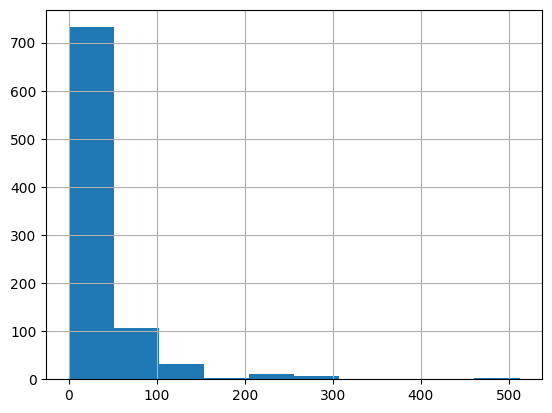

In [145]:
data['Fare'].hist()

From these analyses, it may be interesting to subsequently check entries with a price of 0.

In [146]:
data[data['Fare']==0].shape

(15, 12)

In [147]:
data[data['Fare']==0].head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S


Similarly, it may be interesting to subsequently check entries with the highest prices.

In [148]:
data[data['Fare']>200].shape

(20, 12)

In [149]:
data[data['Fare']>200].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C


The average ticket price can be calculated using the `mean` function.

In [150]:
data['Fare'].mean()

np.float64(32.204207968574636)

We will also single out one categorical attribute. Let it be the gender of the passengers `Sex`. For attributes of this type, we are usually interested in the set of possible values and their frequency. The `value_counts` function can help us with this task, as it calculates the number of occurrences for each possible value.

In [151]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

It is convenient to display statistics related to categorical variables graphically.

In [152]:
statistics_by_gender = data['Sex'].value_counts()

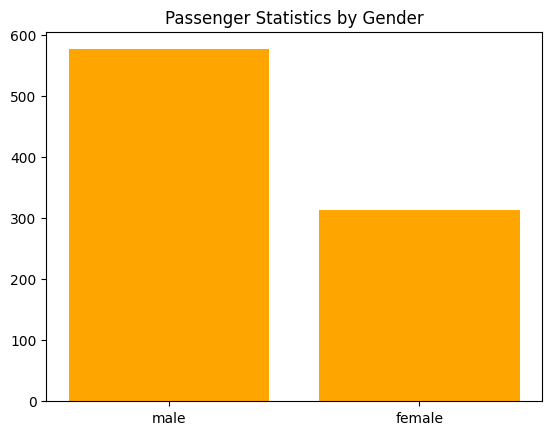

In [153]:
plt.title('Passenger Statistics by Gender')
plt.bar(statistics_by_gender.index, statistics_by_gender.values, color='orange')
plt.show()

## Missing Values

As we can notice from the output of the `info` function, there are attributes with missing values.

One such attribute is the `Embarked` attribute, which marks the station where the passenger boarded the ship. Since we only have two missing values, it is most natural to delete the rows in which they appear. The `isna` function helps us check if a value is missing, while the row deletion itself can be implemented using the `drop` function.

In [154]:
data[data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [155]:
data.drop(index=[61, 829], inplace=True)

In [156]:
data.shape

(889, 12)

As we can notice, we now have two rows less in the dataset. By providing the `index` argument to the `drop` function, we specified the indices of the rows to be deleted, while with the `inplace` argument, we indicated that we want these instances to be deleted "in place". The default behavior when deleting is to generate a modified copy of the data.

In the `Cabin` column, we see that a lot of values are missing - only 204 values are known. Therefore, it is most convenient to delete this column entirely. We will achieve this using the `drop` function, but this time specifying the column name instead of the index.

In [157]:
data.drop(columns=['Cabin'], inplace=True)

In [158]:
data.shape

(889, 11)

In [159]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


The last column with missing values is the `Age` column. Deleting rows with missing values for this attribute would result in losing about one-fifth of the dataset, and the column itself has more known values than missing ones. Therefore, it is convenient to replace the missing values, for example, with the average age of the passengers. The `fillna` function, which expects the value to replace the missing values as an argument, can help us with this task. We also performed this replacement in place by using the `inplace` argument.

In [160]:
average_age = data['Age'].mean()

In [161]:
data['Age'].fillna(average_age, inplace=True)

C:\Users\Mejkerslab\AppData\Local\Temp\ipykernel_10288\1418912913.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(average_age, inplace=True)


<Axes: >

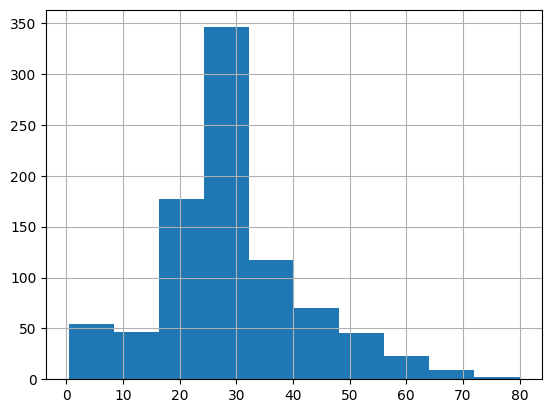

In [162]:
data['Age'].hist()

## Duplicates

The presence of duplicates in the dataset can be checked using the `duplicated` function. This function will return True for each repeated row and False otherwise.

In [163]:
duplicate = data.duplicated()

In [164]:
duplicate.value_counts()

False    889
Name: count, dtype: int64

As we can see, all values are False, so we can conclude that there are no duplicates.

## Detecting Outliers

Detecting outliers involves examining individual attribute values and further analyzing those that seem suspicious or domain-irrelevant. Let's further analyze the `Age` attribute.

By examining the values of the `Age` attribute using the `describe` function and graphically plotting with the `boxplot` function, we notice that there are some unusually small values and some larger values. These need to be further investigated.

In [165]:
data['Age'].describe()

count    889.000000
mean      29.642093
std       12.968346
min        0.420000
25%       22.000000
50%       29.642093
75%       35.000000
max       80.000000
Name: Age, dtype: float64

<Axes: >

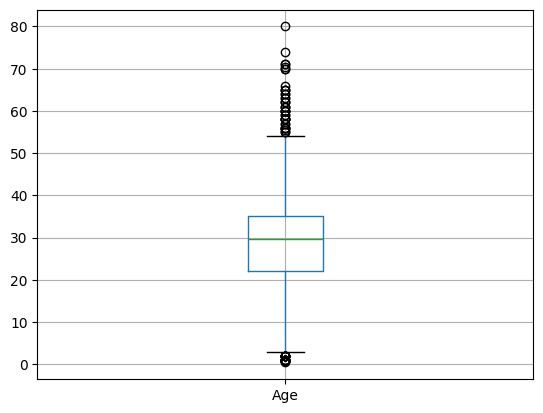

In [166]:
data.boxplot(column=['Age'])

In [167]:
data[data['Age']<1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,S


It appears that there were children on the ship who were younger than one year old (fortunately, they all survived!). For instances where the passenger identifier is 470 and 645, it seems that all data overlaps except for the name. This might be a potential duplicate or they could be sisters; it is unusual that the ticket number is the same.

In [168]:
data[data['Age']>70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,S


It seems that among the selected instances where the age is greater than 70, there are no unusual values.

Similarly, the remaining attributes should be examined further in the same manner.

## Attribute Correlation

To evaluate the correlation of attributes in the dataset, we can use the `corr` function. By default, it calculates the Pearson correlation coefficient between each pair of attributes. Before using this function, let's select the attributes whose correlation we want to examine. Let them be `Survived`, `Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, and `Fare`.

In [169]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [170]:
data_restriction = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].copy()

Since the attribute `Sex` is categorical, we will map the value `male` to 0 and the value `female` to 1. The `map` function will help us with this task.

In [171]:
data_restriction['Sex'] = data_restriction['Sex'].map({'male': 0, 'female':1})

The `corr` function calculates the correlation coefficient values between attributes.

In [172]:
corelation_matrix = data_restriction.corr()

In [173]:
corelation_matrix

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,0.541585,-0.074513,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,-0.127741,-0.328256,0.081656,0.016824,-0.548193
Sex,0.541585,-0.127741,1.000000,-0.089339,0.116348,0.247508,0.179958
Age,-0.074513,-0.328256,-0.089339,1.000000,-0.231908,-0.178013,0.088780
SibSp,-0.034040,0.081656,0.116348,-0.231908,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,0.247508,-0.178013,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,0.179958,0.088780,0.160887,0.217532,1.000000


As we discussed, for easier analysis of the obtained values, the correlation matrix is also displayed in the form of a heatmap. The function `show_corelations` enables such a display.

In [174]:
def show_corelations(cdata):

  # calculate the correlation matrix
  cor_matrix = cdata.corr()

  # prepare axis labels
  atributes_number = cdata.columns.shape[0]
  plt.xticks(np.arange(0, atributes_number), cdata.columns, rotation=45)
  plt.yticks(np.arange(0, atributes_number), cdata.columns)

  # prepare the heatmap
  plt.imshow(cor_matrix)

  # display the color bar with paired colors and values it represents
  plt.colorbar()

  # display the prepared graph
  plt.show()

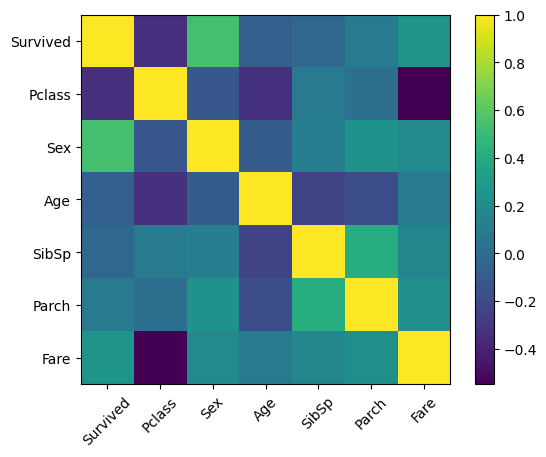

In [175]:
show_corelations(data_restriction)

From this matrix, conclusions can be drawn such as that the lower the passenger class, the lower the ticket price (dark purple square at the intersection of the Fare row and Pclass column), that the gender of the passenger positively correlates with the information of whether the passenger survived (it is useful to know that the evacuation of women and children was carried out), and other information.